# Data Preprocessing

In [6]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def applyClahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    claheimg = clahe.apply(img)
    
    return claheimg

def greenChannel(img):
    greenImage = img[:,:,1]
    
    return greenImage

## 1. Load Image

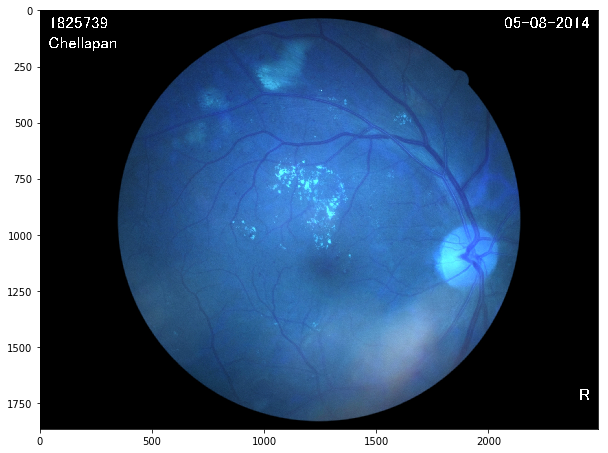

In [8]:
img = cv2.imread("image2.jpg")
# img = cv2.imread("image6.jpeg")
# img = cv2.imread("image5.jpeg")

plt.rcParams["figure.figsize"] = (10,15)
plt.imshow(img, cmap='gray')

## 2. Extract Green Channel and apply CLAHE

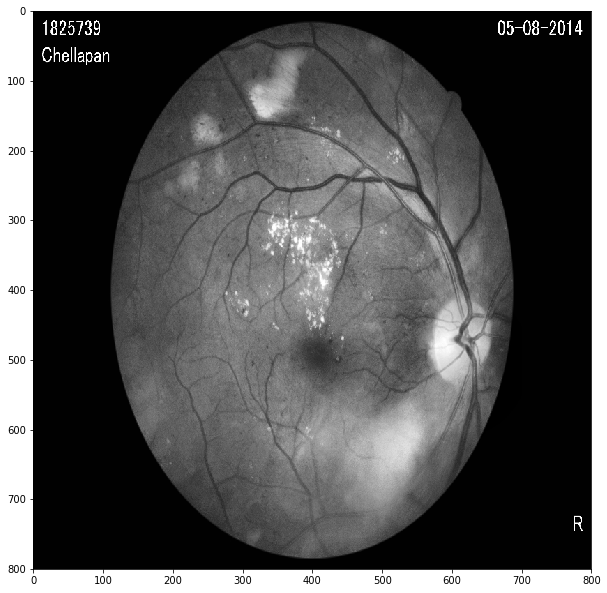

In [9]:
#Research paper - subtracting color average
img = greenChannel(img)

img = cv2.resize(applyClahe(img),(800,800))

plt.imshow(img, cmap='gray')

## 3. Removing Local Colour Average

In [10]:
def magic(img, ksize):
    # Blur the image
    blurred = cv2.blur(img, ksize=(ksize, ksize))

    # Take the difference with the original image
    # Weight with a factor of 4x to increase contrast
    dst = cv2.addWeighted(img, 4, blurred, -4, 128)
    return dst

# retValue, threshImg = cv2.threshold(dst, 200, 255, cv2.THRESH_BINARY) 

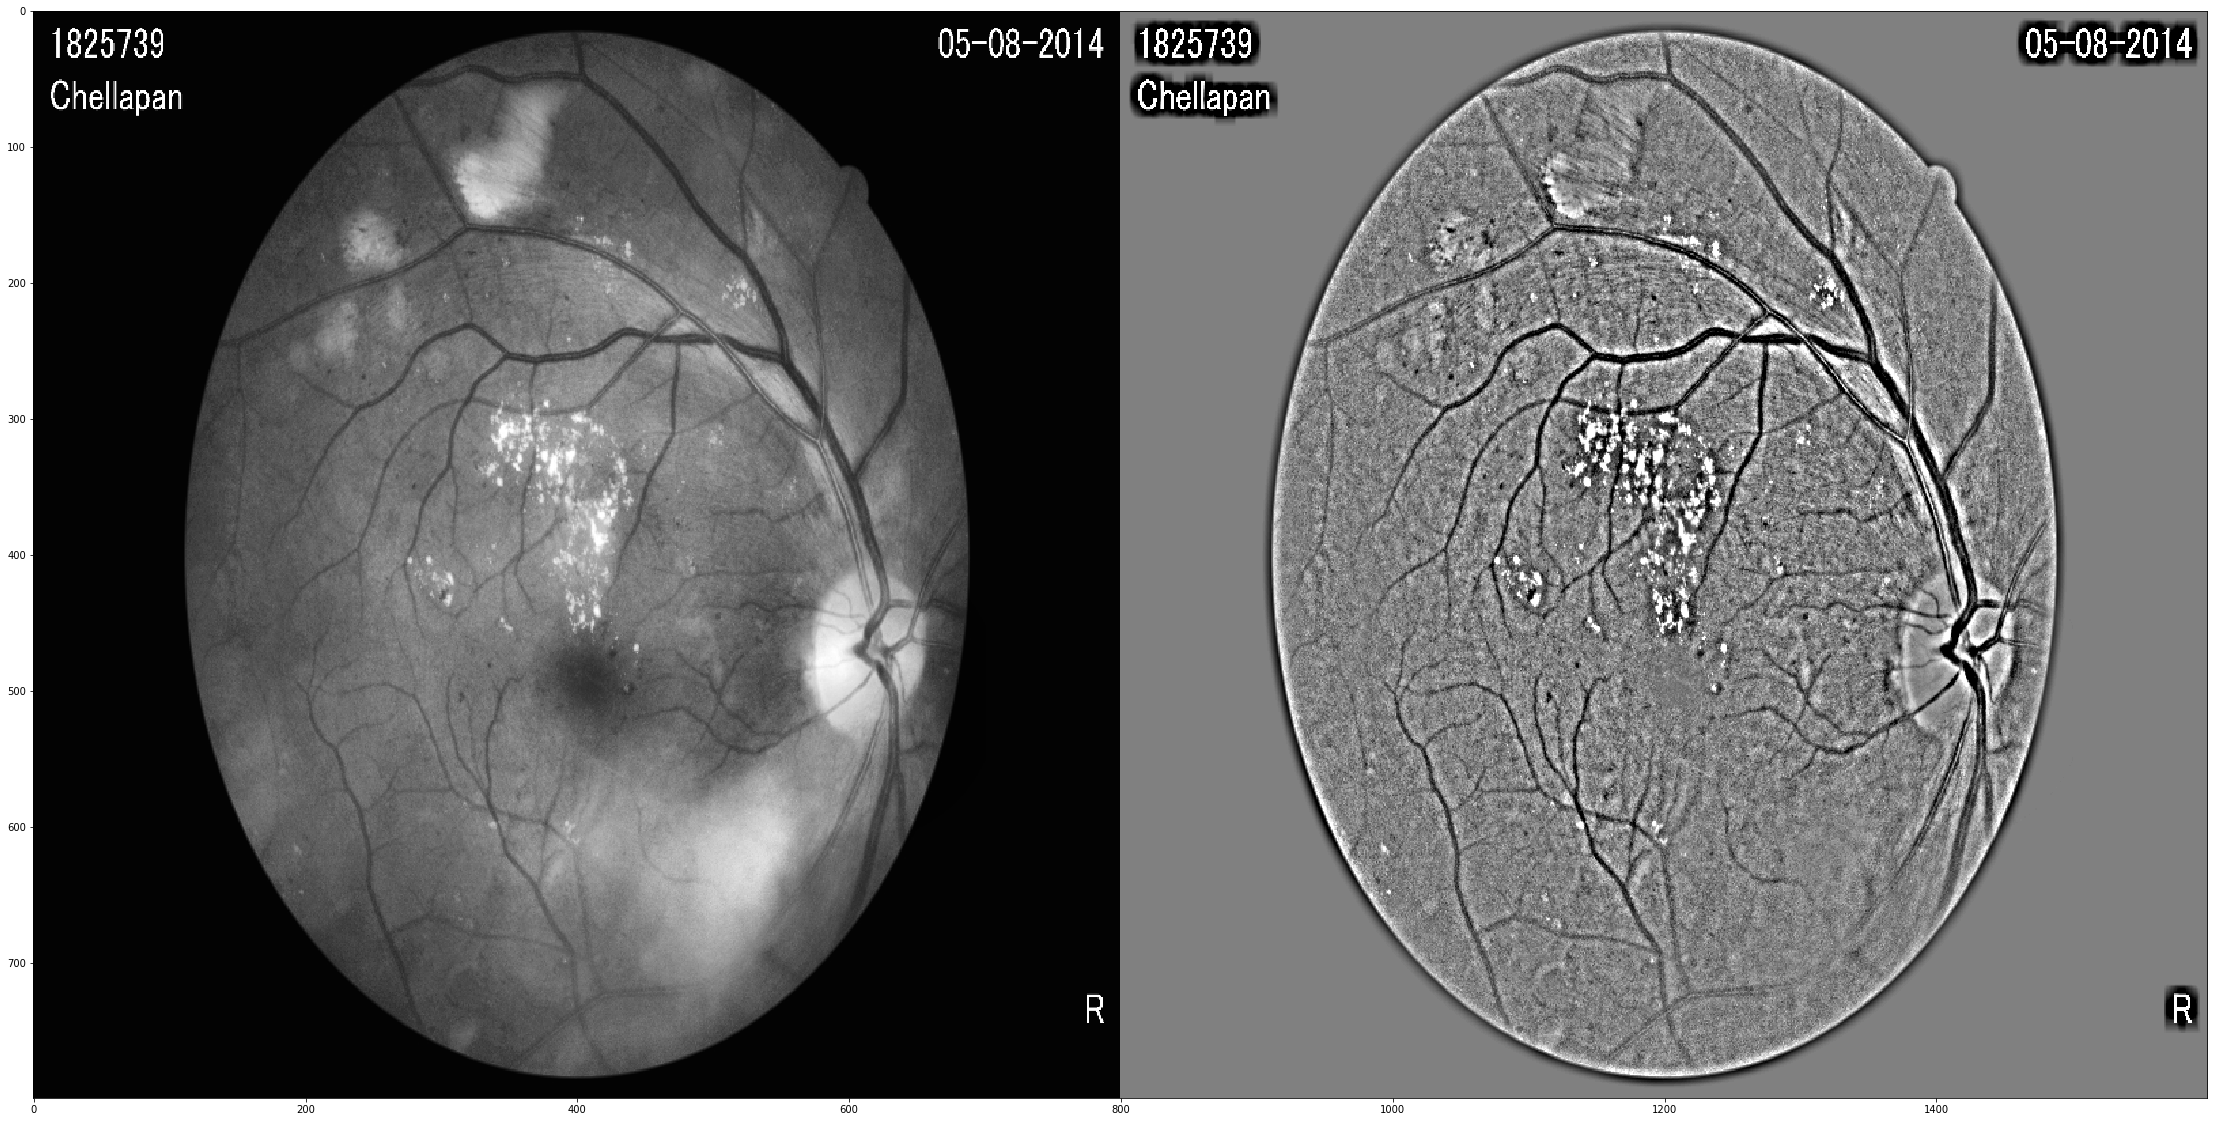

In [13]:
res1 = img
res2 = magic(img,15)

res=np.hstack((res1,res2))
plt.rcParams["figure.figsize"] = (40,20)
plt.imshow(res, cmap='gray')
